In [1]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']
os.environ['LIBRARY_PATH'] = '/usr/lib/x86_64-linux-gnu:'

In [14]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [17]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
np.save('classes.npy', le.classes_)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks

In [19]:
model = Sequential()
model.add(Dense(4, input_shape=(16,)))

In [20]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [21]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, granularity='model')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='model_single_dense/hls4ml_prj',
                                                       backend= 'Vivado',
                                                       part = 'xc7vx690t-3ffg1930'
                                                       )

Interpreting Sequential
Topology:
Layer name: dense_1_input, layer type: Input
Layer name: dense_1, layer type: Dense
  -> Activation (linear), layer name: dense_1
-----------------------------------
Configuration
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
-----------------------------------
Interpreting Sequential
Topology:
Layer name: dense_1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 4]
Creating HLS model


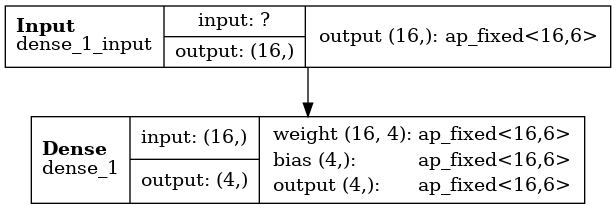

In [22]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [23]:
hls_model.write()

Writing HLS project
Done


In [24]:
!bambu model_single_dense/hls4ml_prj/firmware/myproject.cpp -O3 -fPIC --std=c++14 --compiler=I386_CLANG11 -v4 -D__SYNTHESIS__ --top-fname=myproject --generate-interface=INFER --generate-tb=test_myproject.xml --simulator=VERILATOR --simulate | tee myproject.log

 ==  Bambu executed with: bambu -O3 -fPIC --std=c++14 --compiler=I386_CLANG11 -v4 -D__SYNTHESIS__ --top-fname=myproject --generate-interface=INFER --generate-tb=test_myproject.xml --simulator=VERILATOR --simulate model_single_dense/hls4ml_prj/firmware/myproject.cpp 


********************************************************************************
                    ____                  _
                   | __ )  __ _ _ __ ___ | |_   _   _
                   |  _ \ / _` | '_ ` _ \| '_ \| | | |
                   | |_) | (_| | | | | | | |_) | |_| |
                   |____/ \__,_|_| |_| |_|_.__/ \__,_|

********************************************************************************
                         High-Level Synthesis Tool

                         Politecnico di Milano - DEIB
                          System Architectures Group
********************************************************************************
                Copyright (C) 2004-2021 Politecnico di Milano
Ver

In [3]:
!vivado -mode batch -source /home/li/Hls-and-bambu/bambuhls/HLS_output/Synthesis/vivado_flow_9/vivado.tcl


****** Vivado v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/li/Hls-and-bambu/bambuhls/HLS_output/Synthesis/vivado_flow_9/vivado.tcl
# proc dump_statistics {  } {
#   set util_rpt [report_utilization -return_string]
#   set LUTFFPairs 0
#   set SliceRegisters 0
#   set Slice 0
#   set SliceLUTs 0
#   set SliceLUTs1 0
#   set BRAMFIFO36 0
#   set BRAMFIFO18 0
#   set BRAMFIFO36_star 0
#   set BRAMFIFO18_star 0
#   set BRAM18 0
#   set BRAMFIFO 0
#   set BIOB 0
#   set DSPs 0
#   set TotPower 0
#   set design_slack 0
#   set design_req 0
#   set design_delay 0
#   regexp --  {\s*LUT Flip Flop Pairs\s*\|\s*([^[:blank:]]+)} $util_rpt ignore LUTFFPairs
#   regexp --  {\s*Slice Registers\s*\|\s*([^[:blank:]]+)} $util_rpt ignore SliceRegisters
#   regexp --  {\s*Slice\s*\|\s*([^[:blank:]]+)} $util_rpt ignore Slice
#   regexp --  {\s*Slic

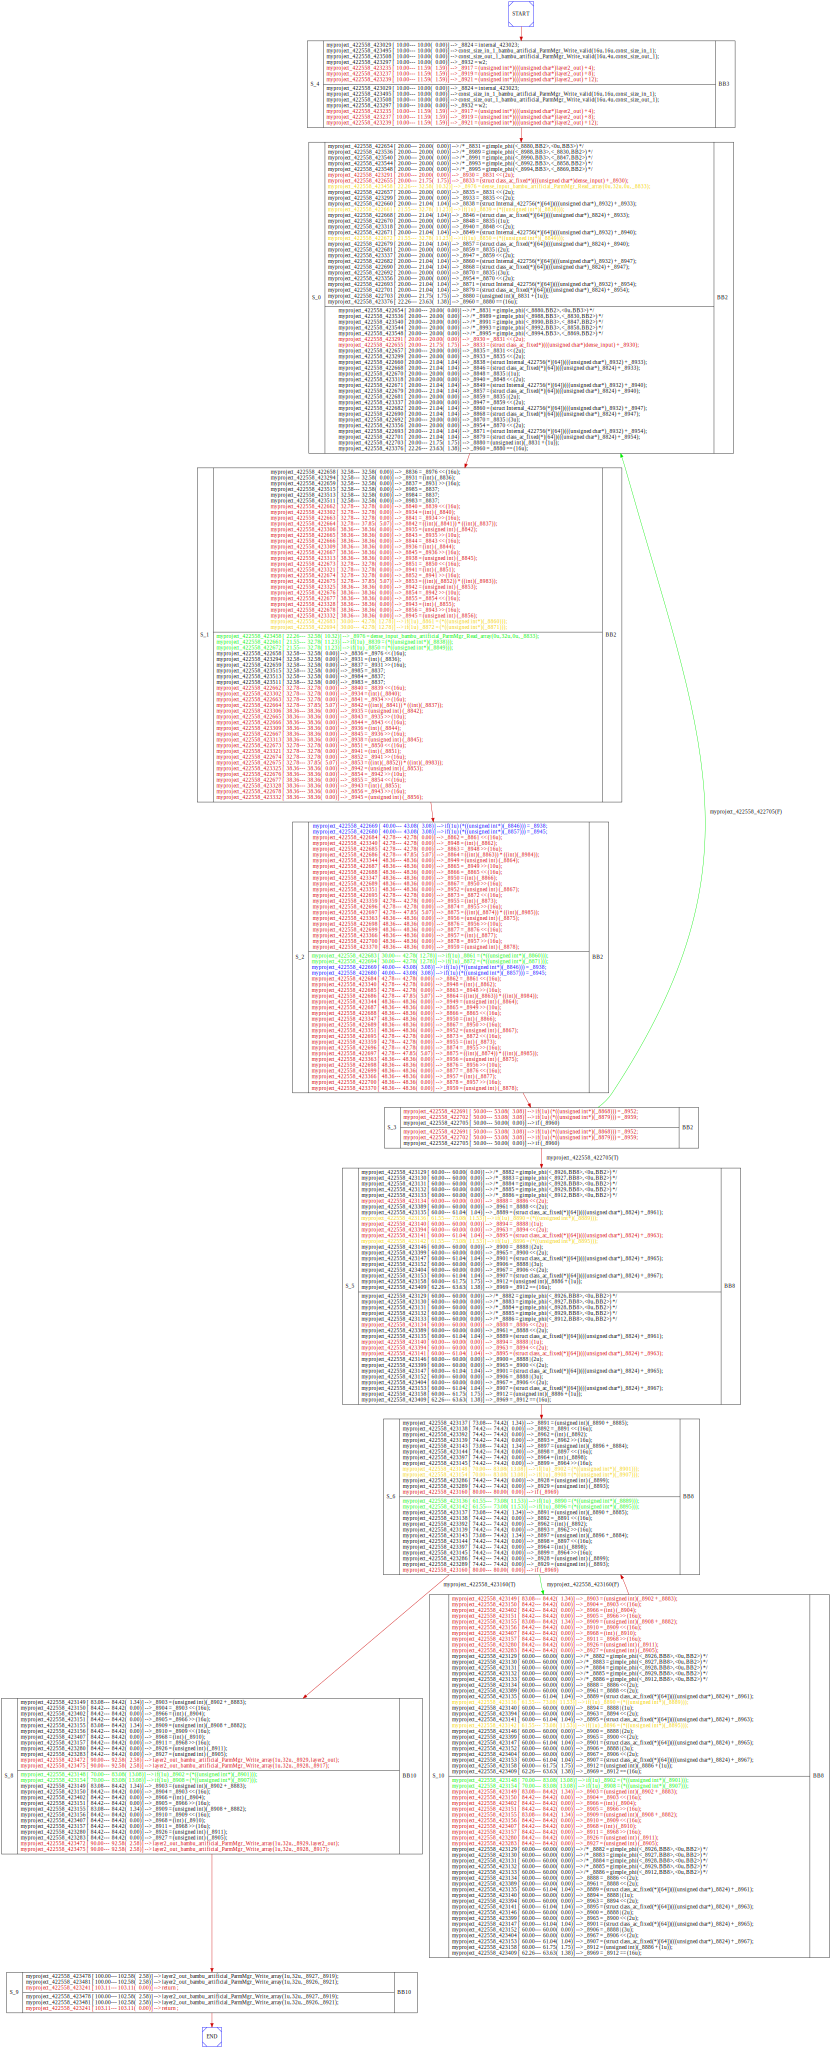

In [1]:
from graphviz import Source
Source.from_file('HLS_output/dot/myproject/HLS_STGraph.dot')